In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import sys
np.set_printoptions(threshold=sys.maxsize)


# Preprocessing data

In [9]:
df=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/nifty_sensex_close_data/data/M&M.NS_2011_to_2023.csv')

l=int(len(df))
n=int(0.8*l)
n


2563

In [3]:

def make_dataset(df,w):
    
    l=int(len(df))
    n=int(0.8*l)

    #for close price
    df_close=df['M&M.NS_close']
    df_close = df_close.astype(float)
    data_i=np.zeros((l-w,w))

    for i in range (l-w):
        for j in range(w):
            data_i[i][j]=df_close[i+j]

    data_o=np.array([df_close[i+w] for i in range(l-w)])
    data_o=data_o.reshape(l-w,1)

    data=np.column_stack((data_i,data_o))

    #training and validating data
    tv_data=data[:n,:]
    np.random.seed(0)
    np.random.shuffle(tv_data)

    #test data
    test_data=data[n:,:-1]
    act_data=data[n:,-1]
    
    return tv_data,test_data,act_data



In [4]:
#splitting the dataset into training and valdation

def split_dataset(ran_tv_close):
    
    X_close=ran_tv_close[:,:-1]
    y_close=ran_tv_close[:,-1]
    X_train_close, X_val_close, y_train_close, y_val_close = train_test_split(X_close, y_close, test_size=0.2, random_state=0)

    return X_train_close, X_val_close, y_train_close, y_val_close


# model 

In [5]:
def random_forest(X_train_close, X_val_close, y_train_close):
    
    param_grid = {'n_estimators': [100, 200, 300, 1000], 
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
    
    random_forest = RandomForestRegressor()

    #for close price
    rf_grid_c = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
    rf_grid_c.fit(X_train_close, y_train_close)
    y_predv_close = rf_grid_c.predict(X_val_close)

    return y_predv_close,rf_grid_c

In [6]:
#making predictions
def predictions(testdata_close,rf_grid_c):

    y_pred_close = rf_grid_c.predict(testdata_close)

    return y_pred_close

In [7]:
#mae and accuracy for validation
def mae_accuracy(y_predv_close,y_val_close):
   
    mae_close = np.mean(abs(y_predv_close - y_val_close))

    return mae_close

#mae and accuracy for test data
def mae_accuracy_test(y_pred_close,df,act_data):

    mae_close = np.mean(abs(y_pred_close - act_data))

    return mae_close

In [11]:
tv_data,test_data,act_data=make_dataset(df,25)
act_data=act_data.reshape(len(act_data),1)
act_data.shape,test_data.shape,tv_data.shape

((616, 1), (616, 25), (2563, 26))

In [12]:
tv_data,test_data,act_data=make_dataset(df,25)
X_train_close, X_val_close, y_train_close, y_val_close=split_dataset(tv_data)
y_predv_close,rf_grid_c=random_forest(X_train_close, X_val_close, y_train_close)
y_pred_close=predictions(test_data,rf_grid_c)
mae_val=mae_accuracy(y_predv_close,y_val_close)
mae_test=mae_accuracy_test(y_pred_close,df,act_data)

print("MAE for validation data is: ",mae_val)
print("MAE for test data is: ",mae_test)



MAE for validation data is:  7.787217423094984
MAE for test data is:  286.01375555791043


In [17]:
#accuracy for validation data
acc_val=1-(mae_val/np.mean(y_val_close))
print("Accuracy for validation data is: ",acc_val)

#accuracy for test data
acc_test=1-(mae_test/np.mean(act_data))
print("Accuracy for test data is: ",acc_test)


Accuracy for validation data is:  0.9855297414526056
Accuracy for test data is:  0.7510593410236381


# Plotting graphs

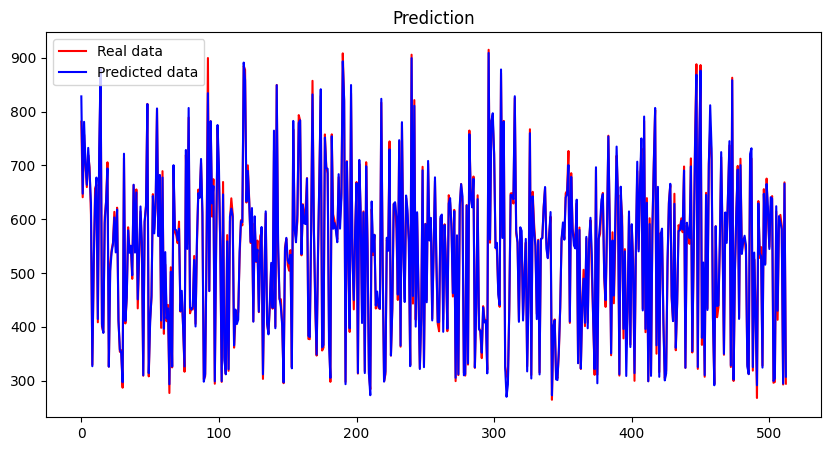

In [18]:
# actual data vs predicted data for validation data
plt.figure(figsize=(10,5))
plt.plot(y_val_close, color = 'red', label = 'Real data')
plt.plot(y_predv_close, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()


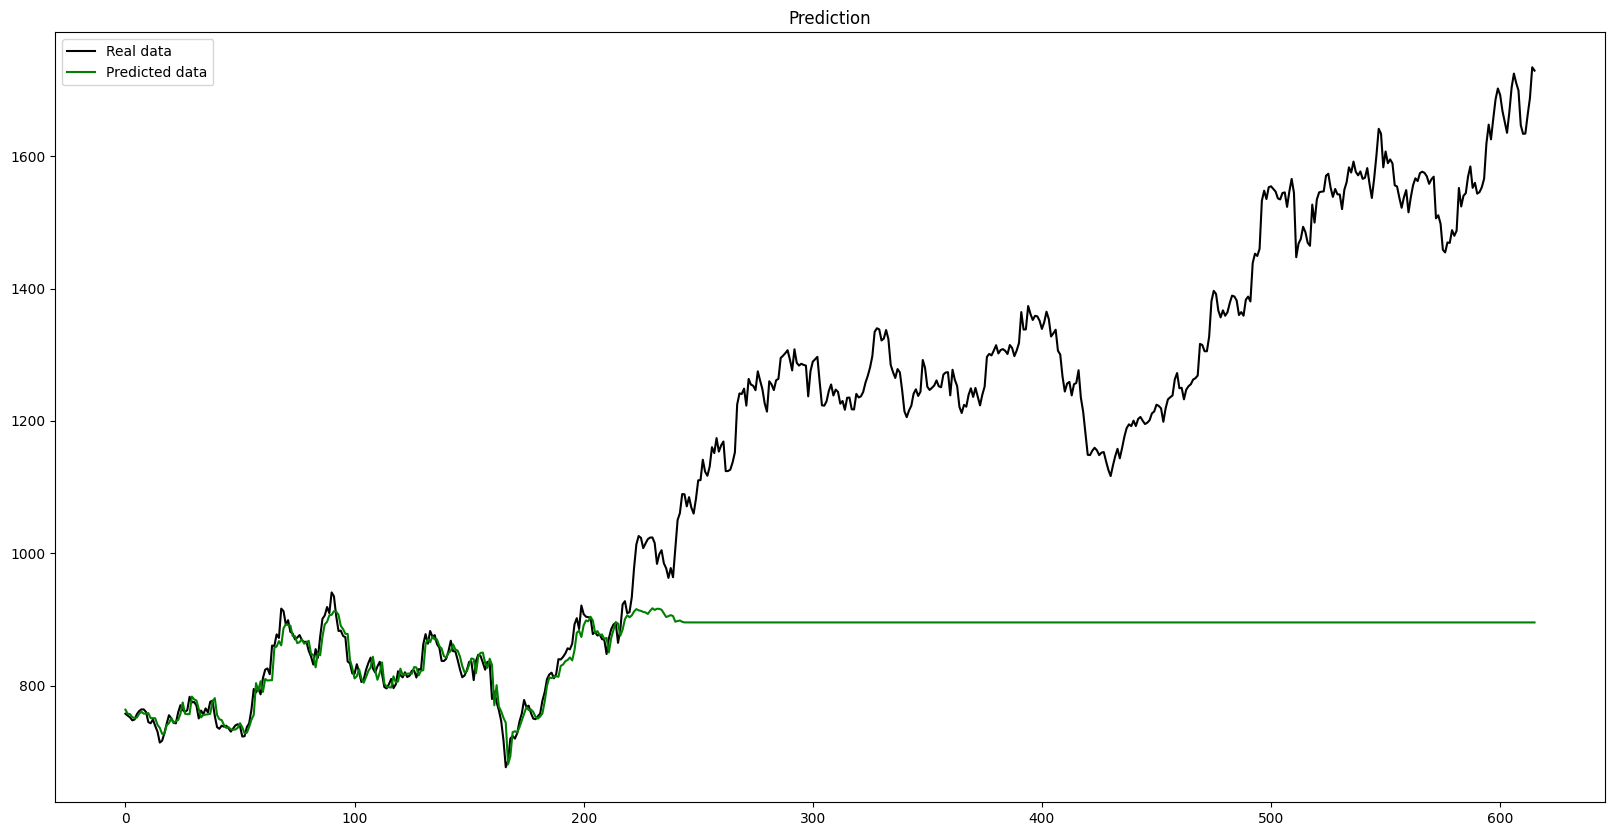

In [22]:
# actual data vs predicted data for test data
plt.figure(figsize=(20,10))
plt.plot(act_data, color = 'black', label = 'Real data')
plt.plot(y_pred_close, color = 'green', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

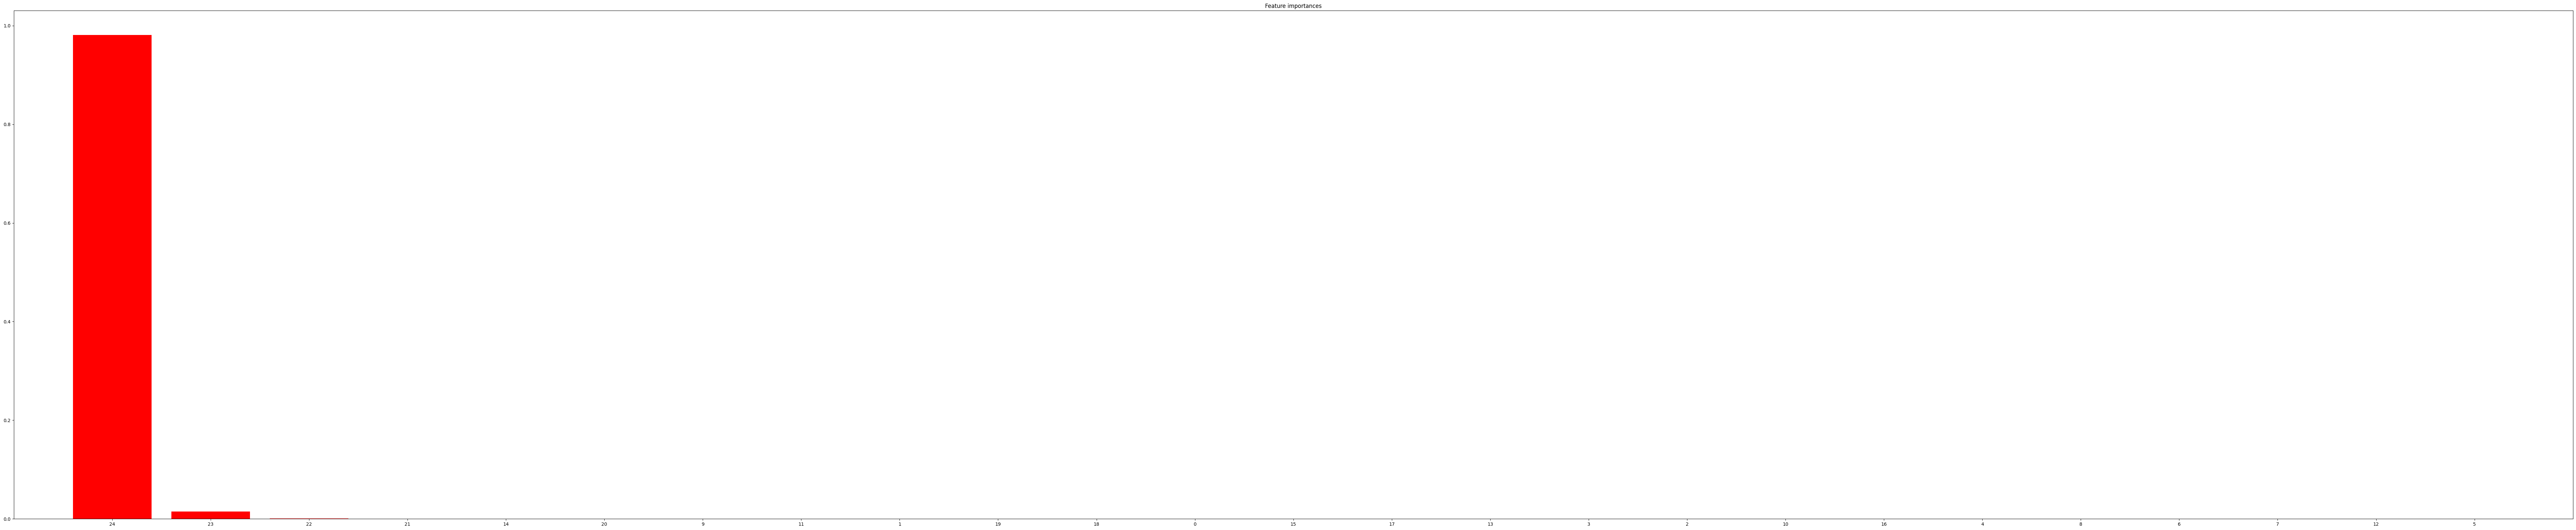

In [20]:
#feature importance
importances = rf_grid_c.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(100,20))
plt.title("Feature importances")
plt.bar(range(X_train_close.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train_close.shape[1]), indices)
plt.xlim([-1, X_train_close.shape[1]])
plt.show()

